In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from src import image_metrics, io_utils, image_utils
from src.Tile import Tile

# Filtering by contrast

Now that we have square images, I am going to filter out low contrasting images using `tile_uniform_contrast` metric that I defined in `src.image_metrics`. First, I will crop images to square size, then apply the metric, which will chop image into equal squares and check contrast in each of them separately in order to remove images with solid backgrounds.

I am using user-defined class Tile, that is defined as square image + collection of operations that can be performed on it, to help with this step.

`tile_uniform_contrast` is normalised, meaning that an image of low contrast which is uniform in it's contrast will be considered as good, as I noticed that some beautiful tiles were dropped by un-normalised rule if they are, for example, in pastel tones.

In [4]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/portuguese tile',
    'dataset/bing/azulejo vector',
    'dataset/bing/portuguese tile vector'
]

Working on dataset/google/azulejo folder.
Contrasts of the images


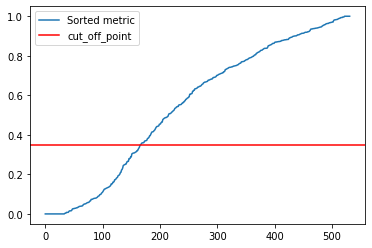

Random sample of low contrast images (cropped and resized):


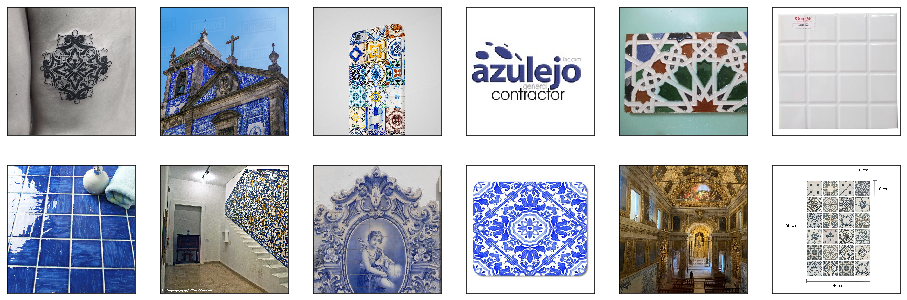

Random sample of contrasting images (cropped and resized):


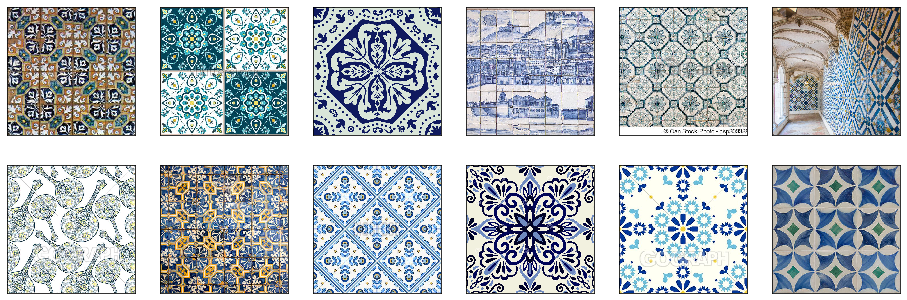

Total files: 532, out of them contrasting: 366.



Working on dataset/google/portuguese tiles folder.
Contrasts of the images


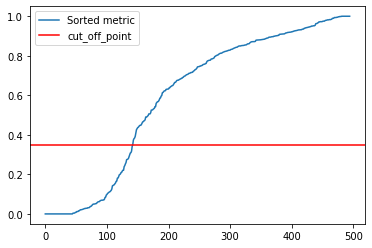

Random sample of low contrast images (cropped and resized):


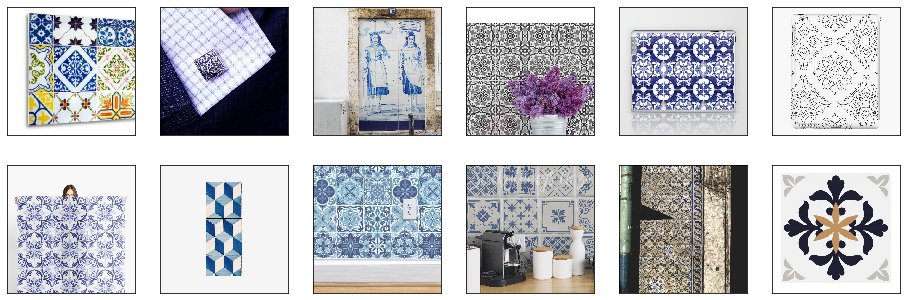

Random sample of contrasting images (cropped and resized):


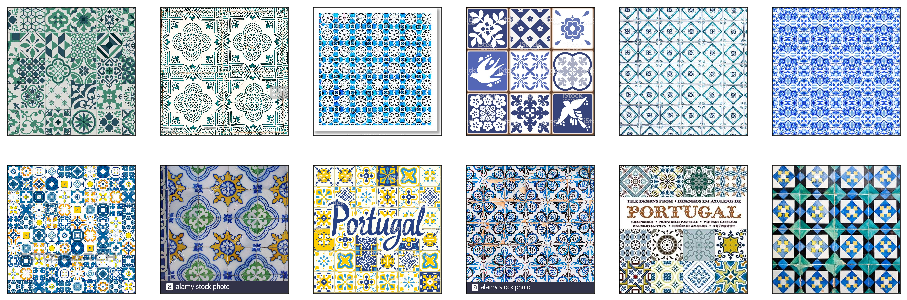

Total files: 495, out of them contrasting: 353.



Working on dataset/bing/azulejo folder.
Contrasts of the images


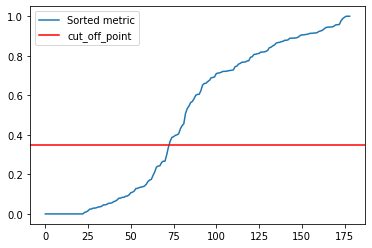

Random sample of low contrast images (cropped and resized):


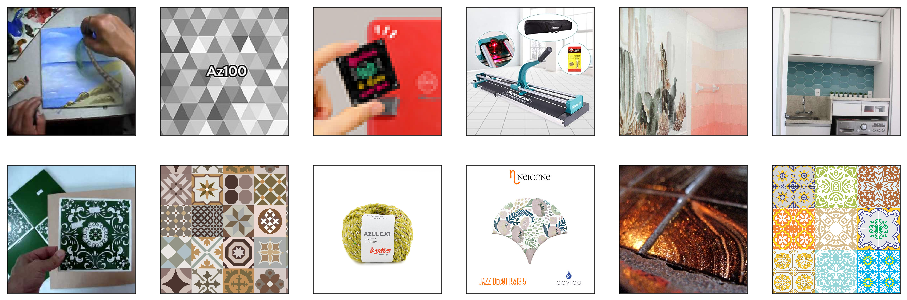

Random sample of contrasting images (cropped and resized):


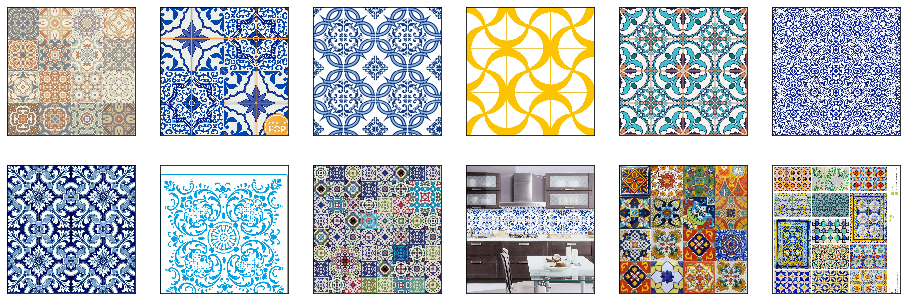

Total files: 179, out of them contrasting: 106.



Working on dataset/bing/portuguese tile folder.
Contrasts of the images


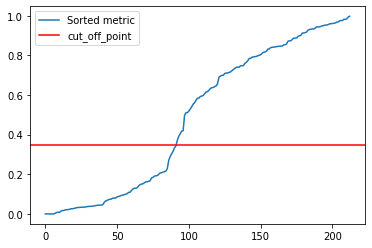

Random sample of low contrast images (cropped and resized):


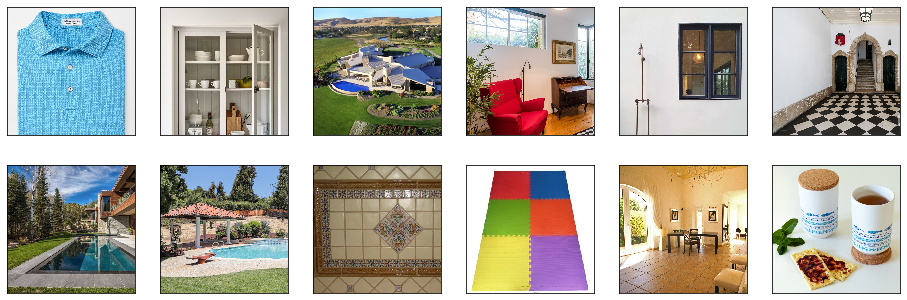

Random sample of contrasting images (cropped and resized):


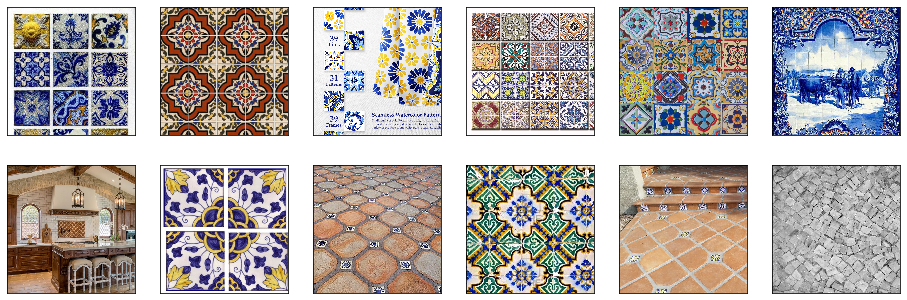

Total files: 213, out of them contrasting: 121.



Working on dataset/bing/azulejo vector folder.
Contrasts of the images


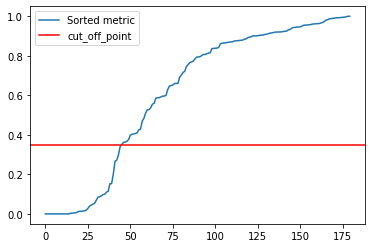

Random sample of low contrast images (cropped and resized):


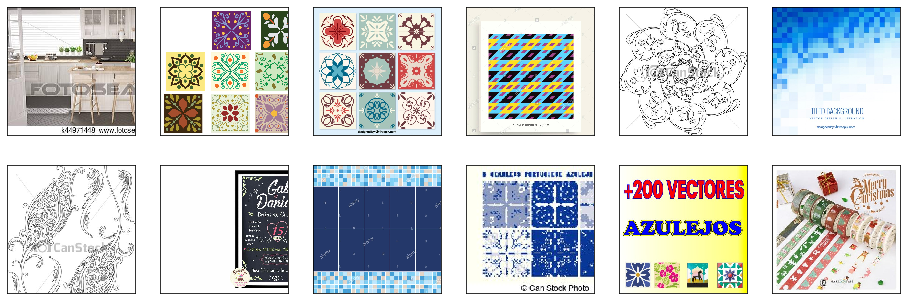

Random sample of contrasting images (cropped and resized):


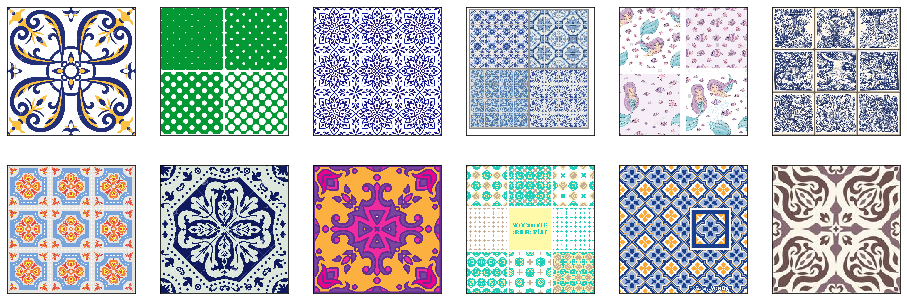

Total files: 180, out of them contrasting: 135.



Working on dataset/bing/portuguese tile vector folder.
Contrasts of the images


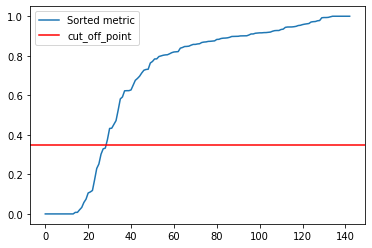

Random sample of low contrast images (cropped and resized):


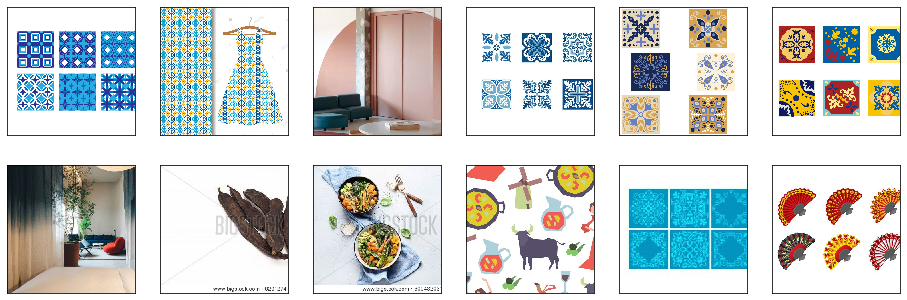

Random sample of contrasting images (cropped and resized):


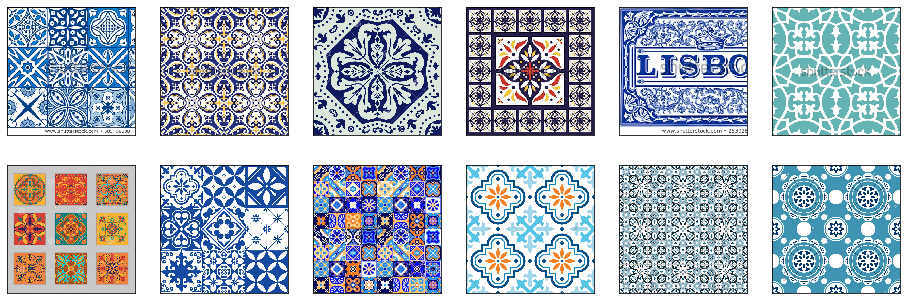

Total files: 143, out of them contrasting: 114.





In [5]:
plot_sample = 12
cut_off = 0.35

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_ for _ in os.listdir(folder)  if _.endswith(".jpg")]
    
    imgs = [image_utils.prepare(img) for img in io_utils.read_imgs(files, folder)]
    tiles = [Tile(img) for img in imgs]
    contrasts = list(map(image_metrics.tile_uniform_contrast, tiles))
    
    print('Contrasts of the images')
    io_utils.plot_metric(contrasts, cut_off)
    
    files_contrasting = [_[0] for _ in zip(files, contrasts) if _[1] >= cut_off]
    imgs_contrasting = [image_utils.prepare(img) for img in io_utils.read_imgs(files_contrasting, folder)]
    
    sample_other = [_ for _ in files if _ not in files_contrasting]
    imgs_other = [image_utils.prepare(img) for img in io_utils.read_imgs(sample_other, folder)]
    
    print('Random sample of low contrast images (cropped and resized):')
    io_utils.plot_sample_imgs(imgs_other, plot_sample=plot_sample)
    
    print('Random sample of contrasting images (cropped and resized):')
    io_utils.plot_sample_imgs(imgs_contrasting, plot_sample=plot_sample)
    
    print('Total files: {}, out of them contrasting: {}.'.format(len(files), len(files_contrasting)))
    
    with open('lists/contrasting_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in files_contrasting:
            filehandle.write('%s\n' % filename)
            
    print('\n\n')